In [1]:
%matplotlib inline
import matplotlib.pyplot as pyplot
import geopandas as gpd
 
from weavingspace import WeaveUnit
from weavingspace import Tiling

from weavingspace import tiling_utils

import shapely.affinity as affine

**Note: to speed up the tilings make the spacing larger (it's in metres) and set aspect to 1 (the latter will double the speed more or less).**

In [2]:
ak = gpd.read_file("data/imd-auckland-2018.gpkg")

## Triaxial weave

In [3]:
w2_a1 = WeaveUnit(
  weave_type = "cube", spacing = 50000, aspect = 2/3,
  strands = "a|b|c", crs = ak.crs).transform_rotate(20).inset_elements(1000)
# w2_a09 = WeaveUnit(weave_type = "cube", spacing = 100, aspect = .9,
#                   strands = "a|b|c", crs = ak.crs, debug = True)

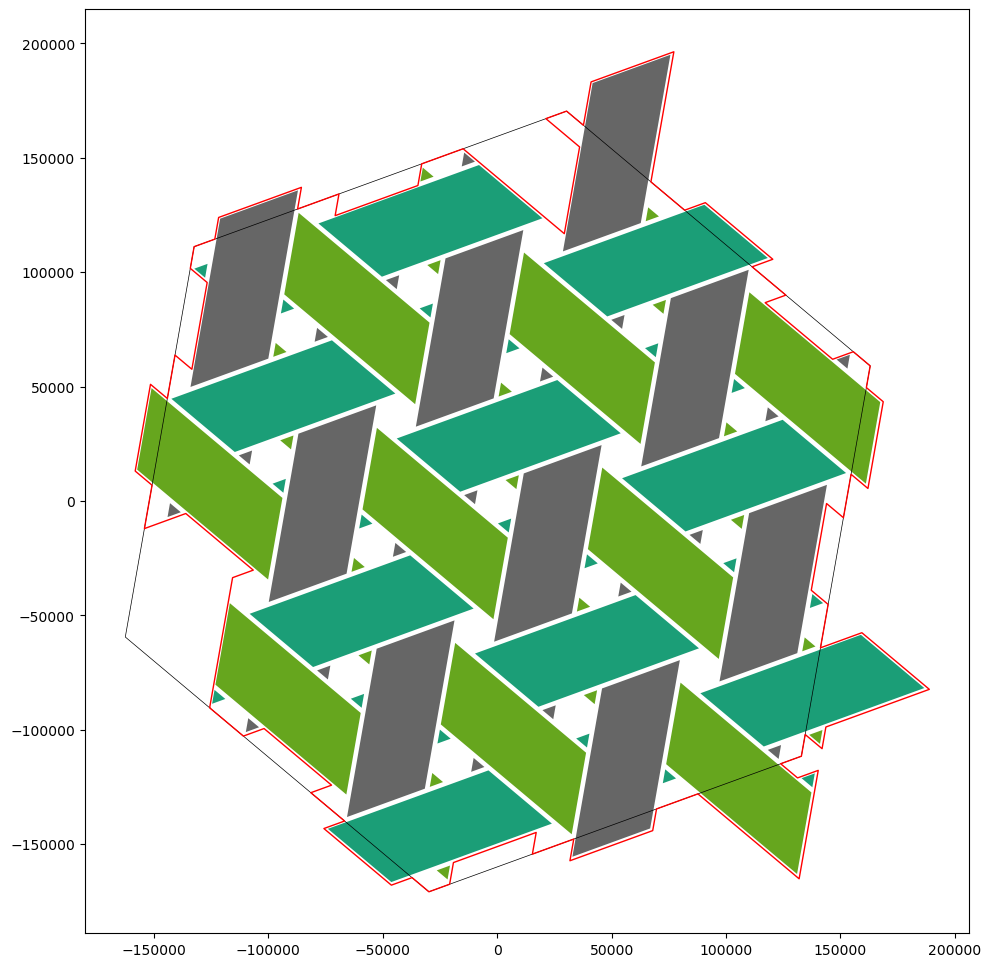

In [4]:
ax = w2_a1.plot(r = 0, figsize = (12, 12), show_reg_tile = True, 
                show_ids = False)